In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv(r'D:\UPG_Machine_Learning\Kaggle Projects\Heart Diesase Prediction\heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [8]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [9]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [10]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [11]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

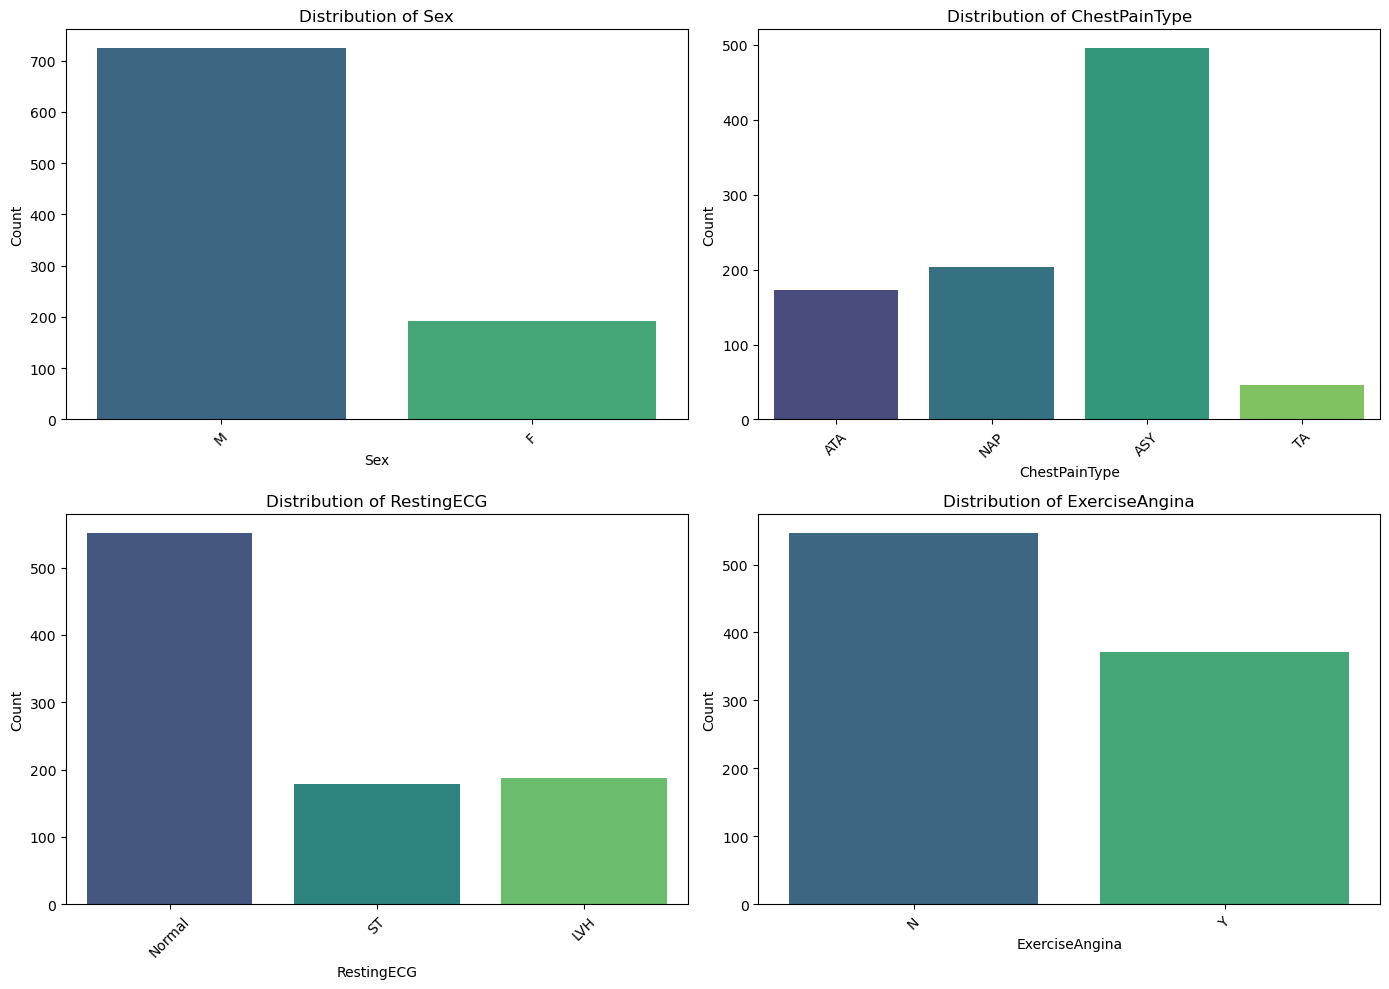

In [12]:
categorical_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']

# Set up the figure and axes
plt.figure(figsize=(14, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=var, palette="viridis", hue=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Desired percentiles
percentiles = [0.25, 0.50, 0.75, 0.99]

# Calculate the percentiles and display
percentile_data = df[numerical_columns].quantile(percentiles)
percentile_data.index = ['25th', '50th', '75th', '99th']  # Rename the index for clarity
print(percentile_data)

       Age  RestingBP  Cholesterol  MaxHR
25th  47.0      120.0       173.25  120.0
50th  54.0      130.0       223.00  138.0
75th  60.0      140.0       267.00  156.0
99th  74.0      180.0       411.49  186.0


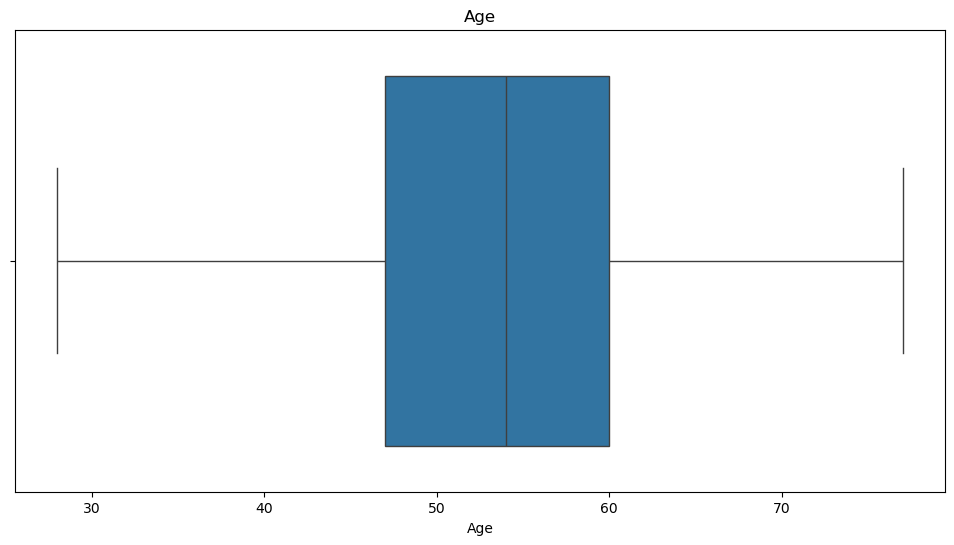

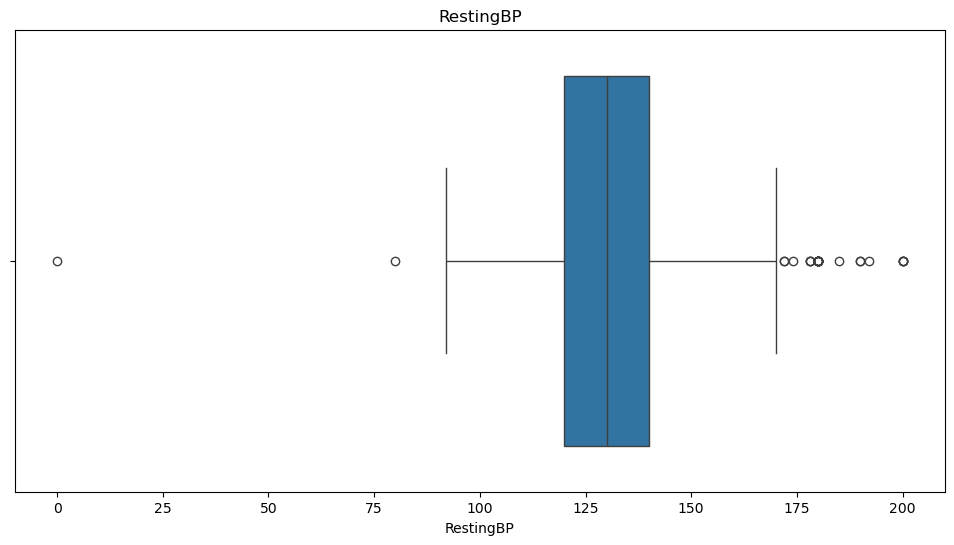

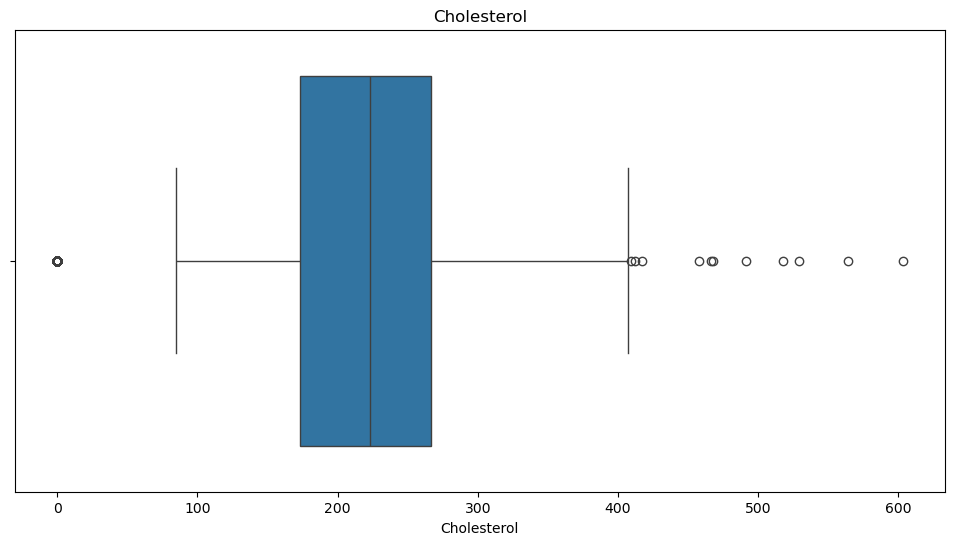

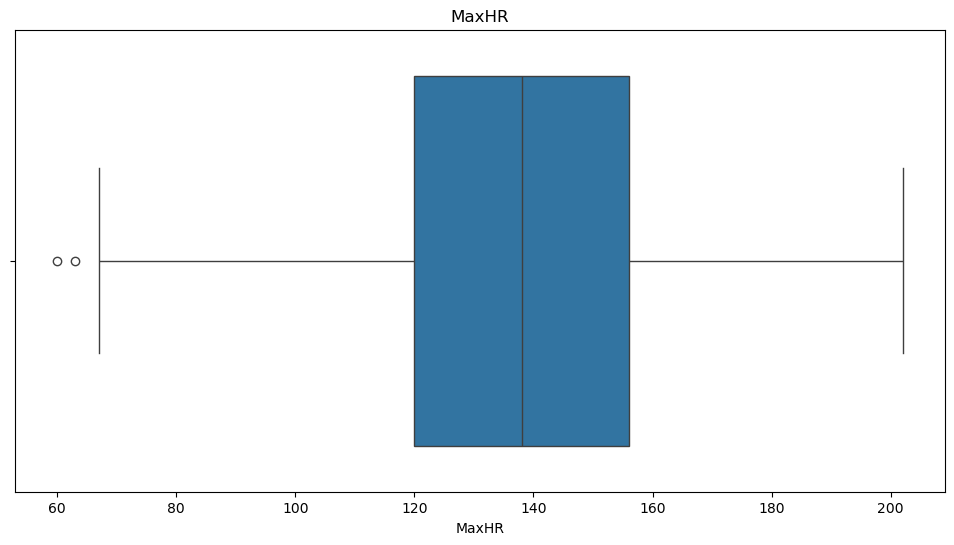

In [14]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()

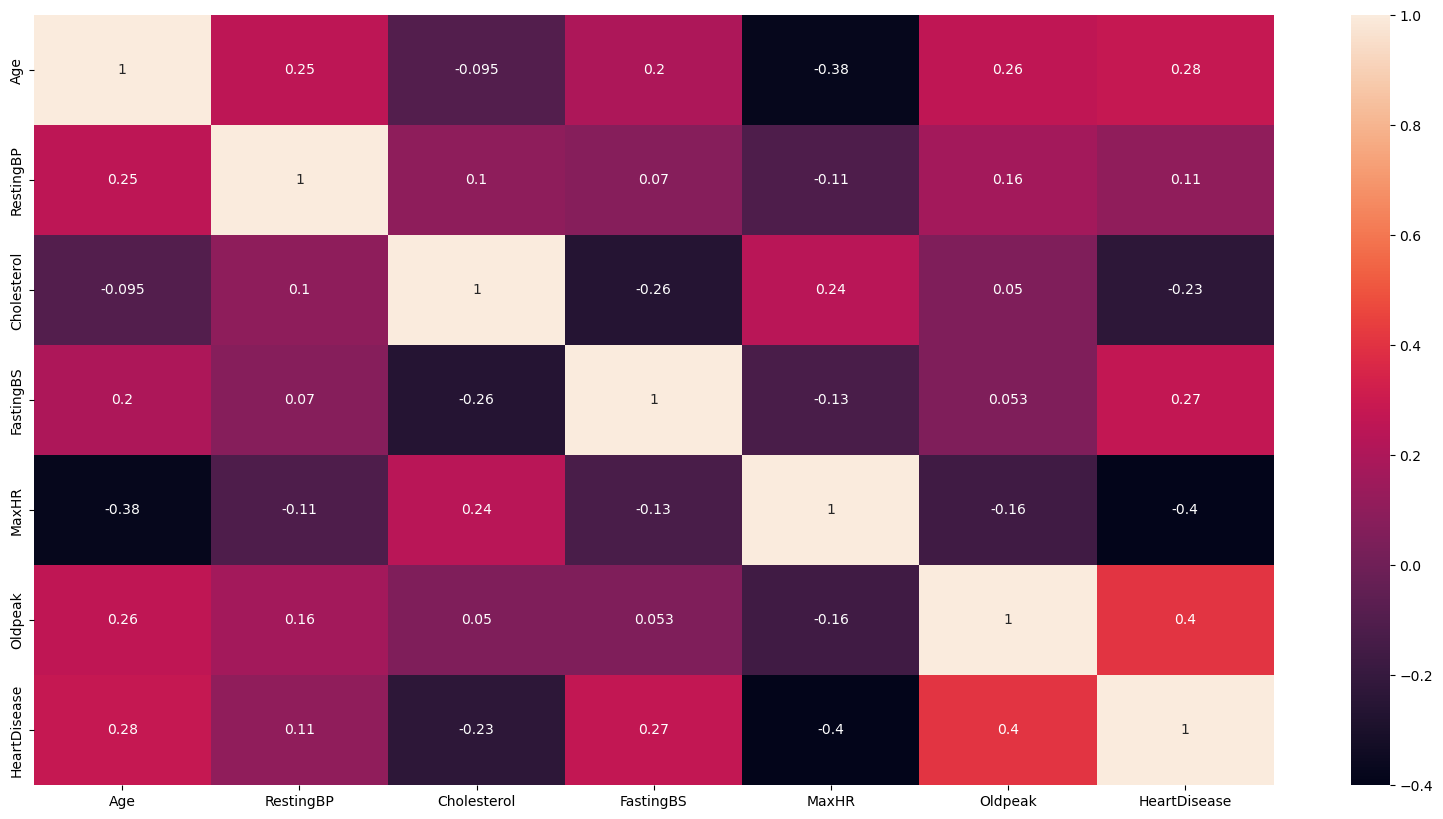

In [15]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(numeric_only = True),annot = True)
plt.show()

In [16]:
df = df[(df['RestingBP'] !=0) & (df['Cholesterol']!=0)]

In [17]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


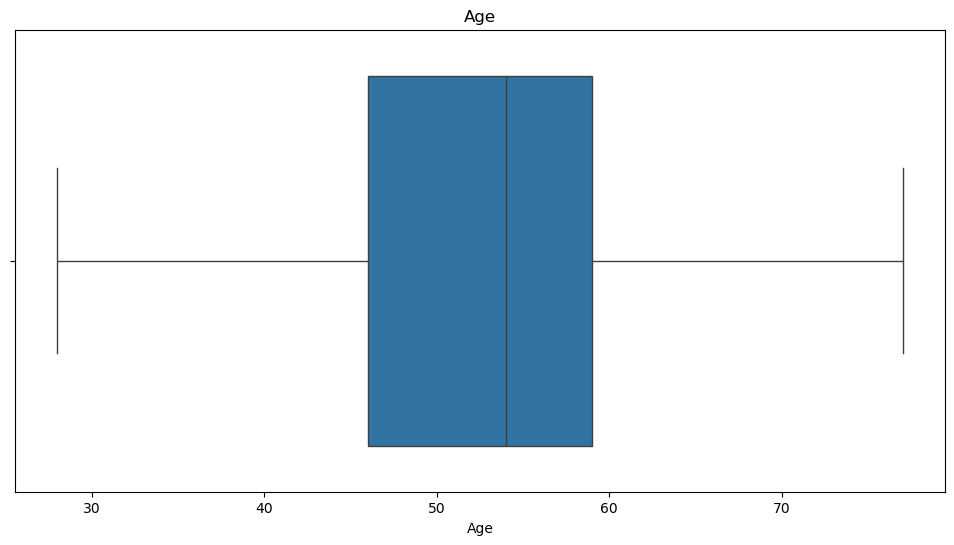

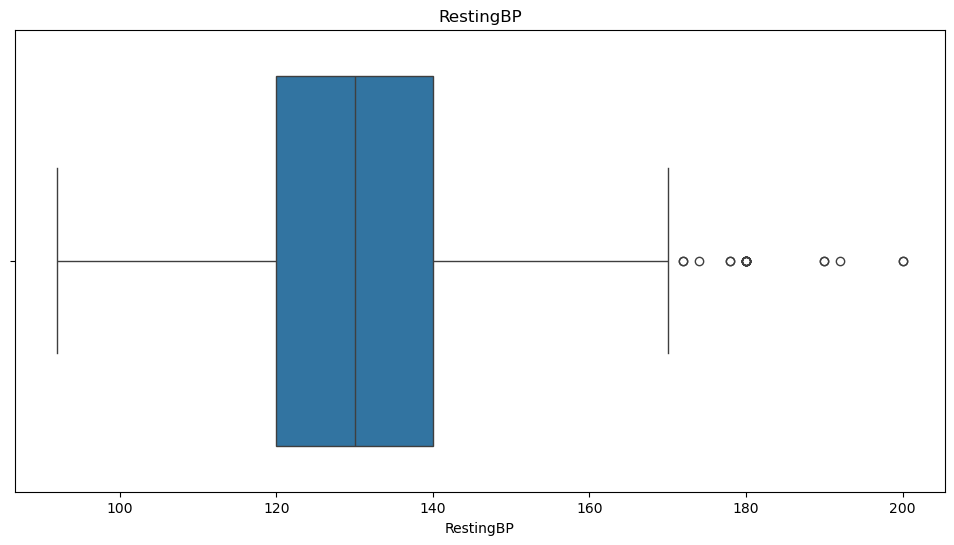

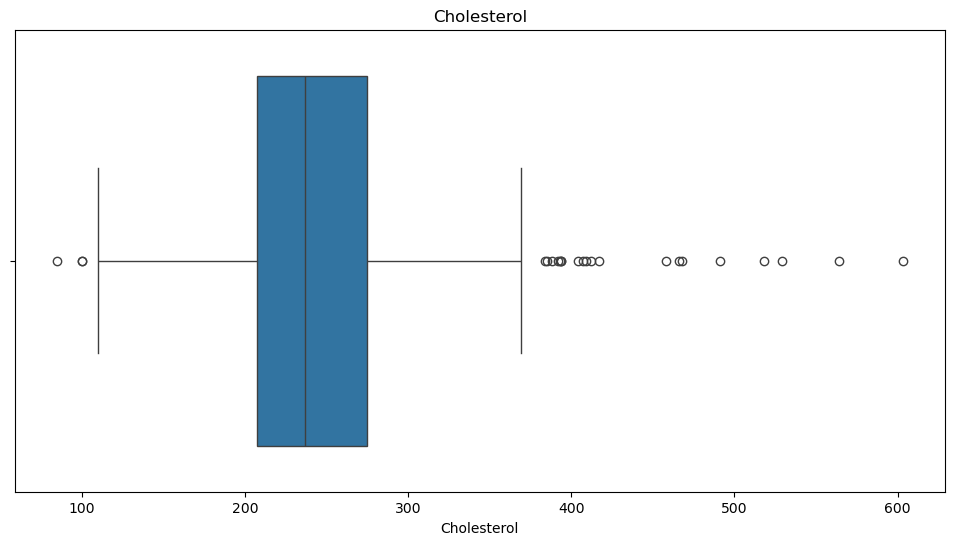

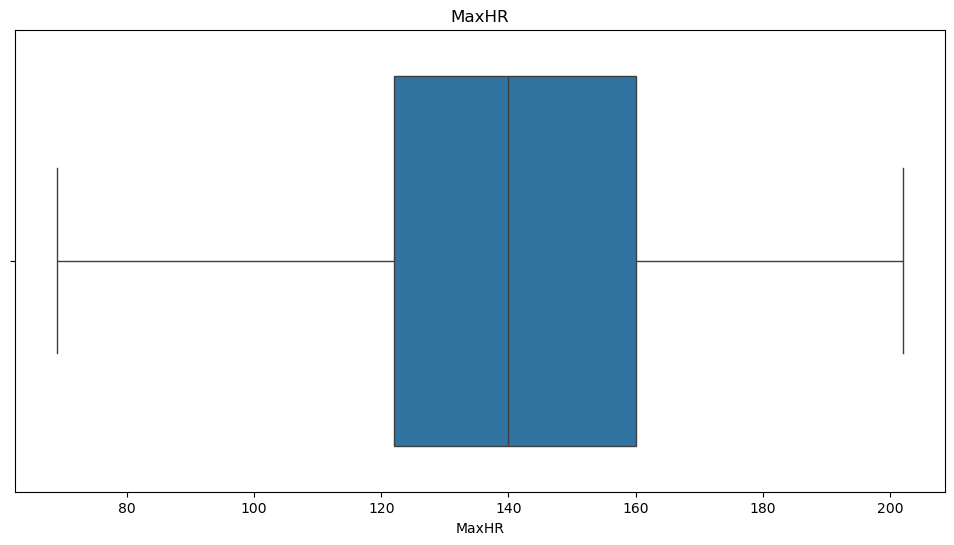

In [18]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()

In [19]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [20]:
encoder = LabelEncoder()

X['Sex'] = encoder.fit_transform(X['Sex'])
X['ChestPainType'] = encoder.fit_transform(X['ChestPainType'])
X['RestingECG'] = encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = encoder.fit_transform(X['ST_Slope'])

In [21]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [22]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size=0.2 , random_state=100)

In [23]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
logreg.score(X_train,y_train)

0.8523489932885906

In [25]:
y_pred = logreg.predict(X_test)

In [26]:
X_test.shape

(150, 11)

In [27]:
y_pred[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8933333333333333


In [29]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[77  9]
 [ 7 57]]


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
y_predicted=y_pred.reshape(-1)

In [ ]:
y_predicted

In [52]:
precision_score(y_test, y_pred)

0.8636363636363636

In [53]:
recall_score(y_test,y_pred)

0.890625

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
p, r, thresholds = precision_recall_curve(y_test, y_pred)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming `y_pred_probabilities` are the probabilities for the positive class
y_pred_probabilities = logreg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probabilities)

plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [ ]:
import numpy as np

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision and Recall for Different Thresholds")
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Testing different regularization strengths
    'solver': ['liblinear', 'lbfgs'],       # Different solvers
    'penalty': ['l2'],                      # Regularization type; 'l1' works only with some solvers
    'max_iter': [500, 1000, 1500]             # Maximum number of iterations for convergence
}

In [44]:
clf= GridSearchCV(logreg, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1, error_score="raise")

In [46]:
best_model=clf.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [47]:
print("Best Hyperparameters:", best_model.best_params_)
print("Best Accuracy Score:", best_model.best_score_)

Best Hyperparameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score: 0.8288580951897534


In [48]:
y_pred2 = best_model.predict(X_test)

In [49]:
print(accuracy_score(y_test, y_pred2))

0.8866666666666667


In [51]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, y_pred2))


0.8507462686567164


In [54]:
recall_score(y_test,y_pred2)

0.890625

In [55]:
y_pred3 = best_model.best_estimator_.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred3)
print("Final Test Accuracy with Best Estimator:", final_accuracy)

Final Test Accuracy with Best Estimator: 0.8866666666666667
